# This notebook was used to create plots and output summary.

In [1]:
import numpy as np
import csv
import os
import copy
import matplotlib.pyplot as plt
import matplotlib
import glob

font = {'family' : 'sans-serif',
        'size'   : 18}
matplotlib.rc('font', **font)


In [2]:
def result_array(results, key='train_loss'):
    
    for nb_run in range(1, 1 + len(results.keys())):
        if nb_run ==1:
            output =  np.array(results['run_nb_' + str(nb_run)][key])
        else:
            output = np.c_[output, np.array(results['run_nb_' + str(nb_run)][key])]
    return output

In [3]:
root = '../logs//nb_filters_64//'
save_dir_plots = '../plots//nb_filters_64//'

csv_files = [f for f in glob.glob(root + "result-*-*-*.csv")] 
csv_name_list = [file.split('/')[-1][:-4] for file in csv_files]


In [4]:
csv_files

['../logs//nb_filters_64/result-1-0.0-100-0.00500000.csv',
 '../logs//nb_filters_64/result-1-1.0-100-0.00500000.csv']

In [5]:
def result_dict(csv_files, index):    

    results = {}
    keys = ['learning_rate', 'batch_size', 'weight_decay', 
            'weight_loss_main', 'weight_loss_aux', 
            'train_loss', 'test_loss', 'train_acc', 'test_acc', 'epoch']
    for run_number in range(1, 10 + 1):
        results['run_nb_' + str(run_number)] = {}
        for key in keys:
            results['run_nb_' + str(run_number)][key] = []

    with open(csv_files[index]) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        run_number = 1
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                results['run_nb_' + row[10]]['learning_rate'].append(float(row[0]))
                results['run_nb_' + row[10]]['batch_size'].append(float(row[1]))
                results['run_nb_' + row[10]]['weight_decay'].append(float(row[2]))
                results['run_nb_' + row[10]]['weight_loss_main'].append(float(row[3]))
                results['run_nb_' + row[10]]['weight_loss_aux'].append(float(row[4]))
                results['run_nb_' + row[10]]['train_loss'].append(float(row[5]))
                results['run_nb_' + row[10]]['test_loss'].append(float(row[6]))
                results['run_nb_' + row[10]]['train_acc'].append(float(row[7]))
                results['run_nb_' + row[10]]['test_acc'].append(float(row[8]))
                results['run_nb_' + row[10]]['epoch'].append(float(row[9]))
                line_count += 1
    return results

In [6]:
def plot_results(results, label, save_dir_plots):           
           
    train_acc = result_array(results, 'train_acc')
    test_acc = result_array(results, 'test_acc')
    means_acc_train = train_acc.mean(axis=1)
    stds_acc_train = train_acc.std(axis=1)
    means_acc_test = test_acc.mean(axis=1)
    stds_acc_test = test_acc.std(axis=1)

    color = ['dimgray', 'm', 'deepskyblue', 'r', 'chartreuse']

    fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))
    fig.subplots_adjust(hspace=20)

    ax1.plot(range(1, 1 + len(means_acc_train)), means_acc_train, color='b', label='train')
    ax1.fill_between(range(1, 1 + len(means_acc_train)),
                     means_acc_train-stds_acc_train,means_acc_train+stds_acc_train,alpha=.2, color='b')
    
    ax1.plot(means_acc_test, color='r', label='test')
    ax1.fill_between(range(len(means_acc_test)),
                     means_acc_test-stds_acc_test,means_acc_test+stds_acc_test,alpha=.2, color='r')
    ax1.set_ylim([50, 100])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(bbox_to_anchor=(1,0.3))
    ax1.set_title(label)
    plt.grid()
    save_dir_plots = save_dir_plots
    if not os.path.exists(save_dir_plots):
        os.makedirs(save_dir_plots)
    plt.savefig(save_dir_plots + label + '.pdf')
    plt.show() 

    print('Max avg. test acc.: {:.2f} % , std: {:.2f} %'.format(np.max(means_acc_test), stds_acc_test[np.argmax(means_acc_test)]))

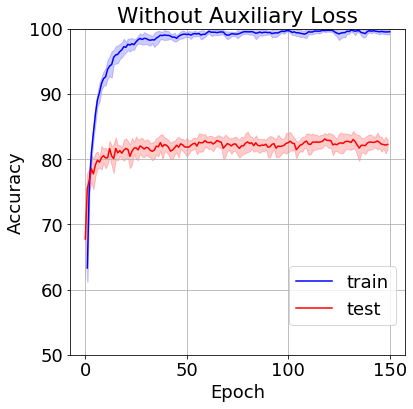

Max avg. test acc.: 83.10 % , std: 0.90 %


In [7]:
plot_results(result_dict(csv_files, index=0), label='Without Auxiliary Loss', save_dir_plots=save_dir_plots)

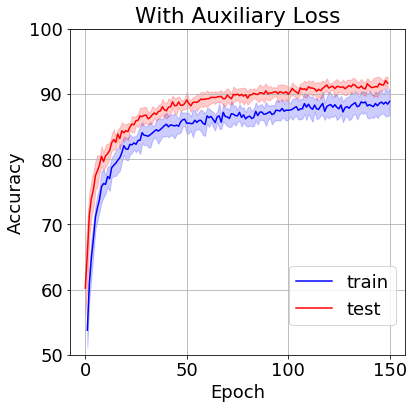

Max avg. test acc.: 92.03 % , std: 0.64 %


In [8]:
plot_results(result_dict(csv_files, index=1), label='With Auxiliary Loss', save_dir_plots=save_dir_plots)